In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns

In [53]:
df=pd.read_csv("card transactions.csv")

In [54]:
df.shape

(96753, 10)

In [55]:
df.columns

Index(['Recnum', 'Cardnum', 'Date', 'Merchnum', 'Merch description',
       'Merch state', 'Merch zip', 'Transtype', 'Amount', 'Fraud'],
      dtype='object')

In [56]:
df.dtypes

Recnum                 int64
Cardnum                int64
Date                  object
Merchnum              object
Merch description     object
Merch state           object
Merch zip            float64
Transtype             object
Amount               float64
Fraud                  int64
dtype: object

In [57]:
df.Date=df.Date.astype(str)

In [58]:
df.Date.dtypes

dtype('O')

In [59]:
df[['Year','Month','Day']]=df.Date.str.split('-',n=2,expand=True)

In [60]:
df['Date']=df['Year']+df['Month']+df['Day']

In [62]:
df=df.drop(columns=['Year','Month','Day'])

In [63]:
df.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,20060101,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,20060101,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,20060101,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,20060101,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,20060101,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [65]:
df['Date'] = pd.to_datetime(df.Date,format='%Y%m%d')

In [69]:
df.dtypes

Recnum                        int64
Cardnum                       int64
Date                 datetime64[ns]
Merchnum                     object
Merch description            object
Merch state                  object
Merch zip                   float64
Transtype                    object
Amount                      float64
Fraud                         int64
dtype: object

In [ ]:
numrecords=len(df)

<AxesSubplot:title={'center':'Daily Transactions'}, xlabel='Date'>

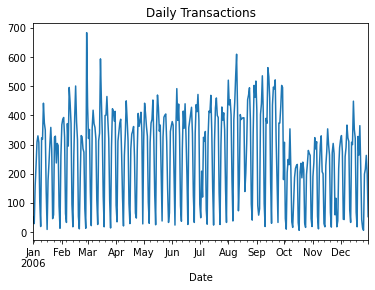

In [70]:
df.assign(trx = np.ones(numrecords)).set_index(df['Date']).resample(dt.timedelta(days = 1))\
    .count().trx.plot(title = 'Daily Transactions')

<AxesSubplot:title={'center':'Weekly Transactions'}, xlabel='Date'>

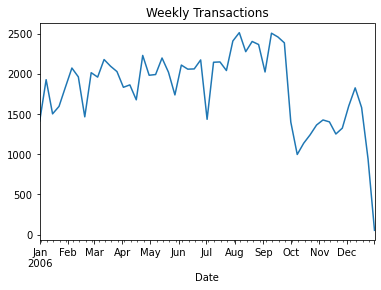

In [71]:
df.assign(trx = np.ones(numrecords)).set_index(df['Date']).resample(dt.timedelta(days = 7))\
    .count().trx.plot(title = 'Weekly Transactions')

In [78]:
numgoods=len(df[df['Fraud']==0])

In [79]:
numbads=len(df[df['Fraud']==1])

<AxesSubplot:title={'center':'Weekly Transactions'}, xlabel='Date'>

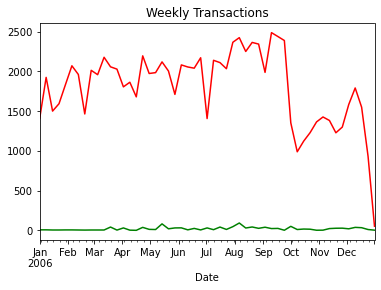

In [82]:
df[df['Fraud']==0].assign(trx = np.ones(numgoods)).set_index(df[df['Fraud']==0]['Date']).resample(dt.timedelta(days = 7))\
    .count().trx.plot(title = 'Weekly Transactions',color='red')
df[df['Fraud']==1].assign(trx = np.ones(numbads)).set_index(df[df['Fraud']==1]['Date']).resample(dt.timedelta(days = 7))\
    .count().trx.plot(title = 'Weekly Transactions',color='green')

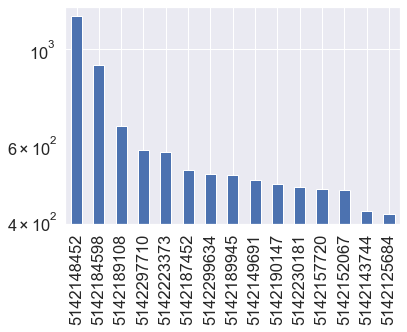

In [85]:
sns.set(font_scale=1.5)
df['Cardnum'].value_counts().head(15).plot(kind = 'bar')
plt.yscale('log')

<AxesSubplot:>

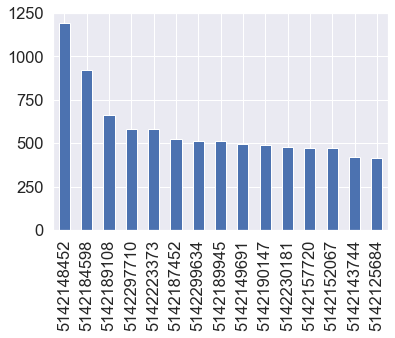

In [86]:
sns.set(font_scale=1.5)
df['Cardnum'].value_counts().head(15).plot(kind = 'bar')
#plt.yscale('log')

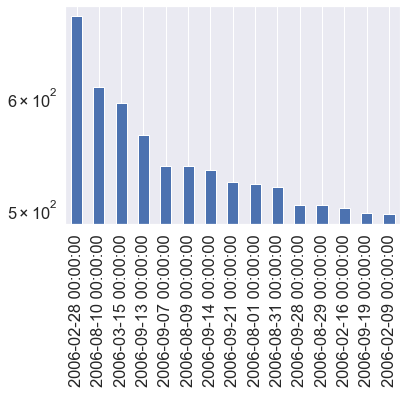

In [87]:
sns.set(font_scale=1.5)
df['Date'].value_counts().head(15).plot(kind = 'bar')
plt.yscale('log')